This program calculates the Effective Tax Percentage on Income.
(Please note this calculation doesn't include Pension contribution)
Your total tax payment will be £ 7,486.00
Your total National Insurance will be : £ 2,994.40
Your Take Home pay will be : £ 39,519.60
Your Deductions percentage is :  20.96%

LISA vs Pension Growth Comparison (to age 60):
    Age     LISA Value  Pension Value
0    31    3250.000000    3289.506979
1    32    6660.225000    6710.594237
2    33   10272.676343   10268.524985
3    34   14099.346050   13968.772963
4    35   18152.937270   17817.030861
5    36   22446.906450   21819.219074
6    37   26995.508003   25981.494816
7    38   31813.841628   30310.261587
8    39   36917.902436   34812.179029
9    40   42324.634051   39494.173169
10   41   48051.984850   44363.447075
11   42   54118.967551   49427.491937
12   43   60545.722327   54694.098593
13   44   67353.583661   60171.369516
14   45   74565.151172   65867.731275
15   46   82204.364637   71791.947505


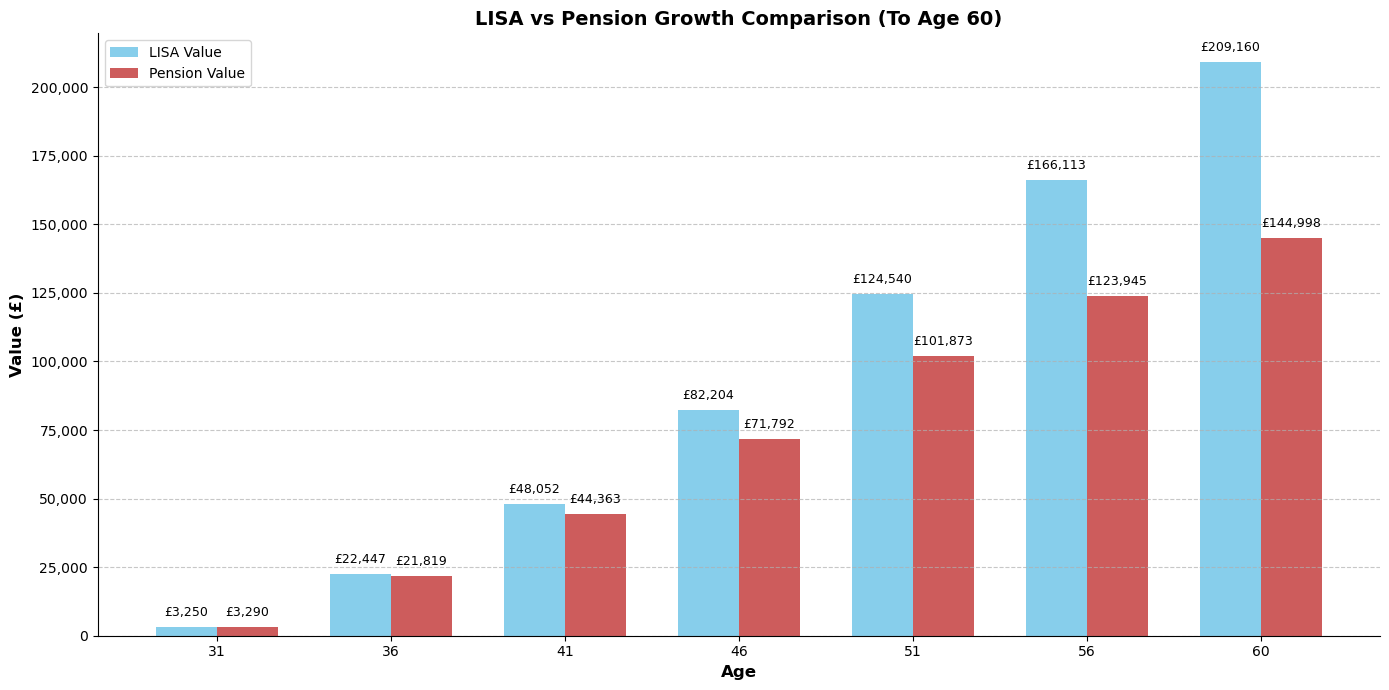

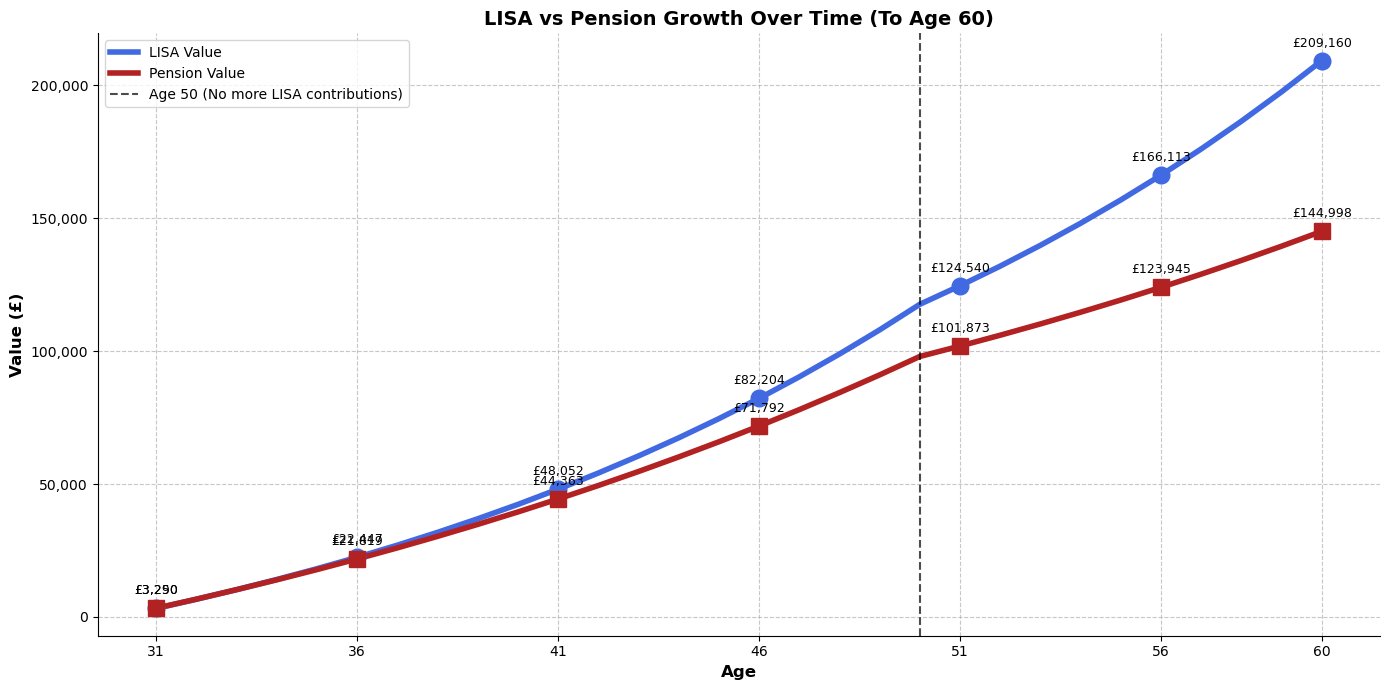

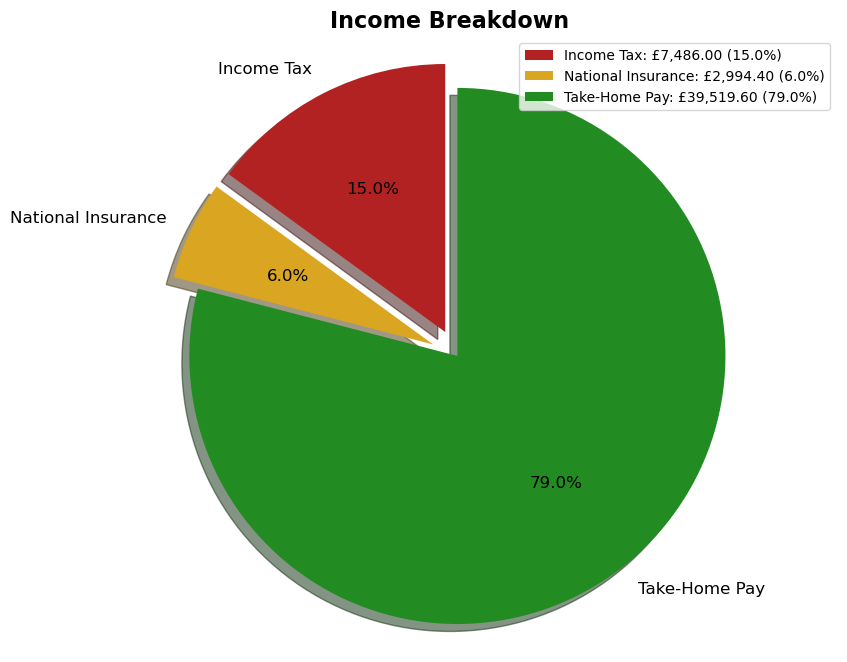

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Add this import for plotting
import seaborn as sns 
import plotly.express as px 
import pygwalker as pyg

# FUNCTION:
def result():
  "This function perform the final calculations and print the results"
  income_after_tax = income_pre_tax - tax - national_insurance
  tax_percentage = (tax + national_insurance) / income_pre_tax if income_pre_tax > 0 else 0
  print("Your total tax payment will be £" , f"{tax:,.2f}")
  print("Your total National Insurance will be : £", f"{national_insurance:,.2f}")
  print("Your Take Home pay will be : £", f"{income_after_tax:,.2f}")
  print("Your Deductions percentage is : ", f"{tax_percentage * 100:.2f}%")

# Main Program
print("This program calculates the Effective Tax Percentage on Income.")
print("(Please note this calculation doesn't include Pension contribution)")
try:
    income_pre_tax = int(input("Enter your Total yearly income: £"))
except ValueError:
    print("Invalid input. Please enter a numeric value.")
    exit()


tax = 0
national_insurance = 0

# Case one when the tax payer is under the personal allowance:
if income_pre_tax <= 12570:
  result()
# Case two when the tax payer on basic rate:
elif 12570 < income_pre_tax and income_pre_tax < 50270:
  tax = (income_pre_tax - 12570) * 0.2
  national_insurance = (income_pre_tax - 12570) * 0.08
  result()
# case 3 when the tax payer is on Higher Rate:
elif 50270 <= income_pre_tax <= 100000:
  tax = (37700 * 0.2) + ((income_pre_tax - 50270) * 0.4)
  national_insurance = (37700 * 0.08) + ((income_pre_tax - 50270) * 0.02)
  result()
# Case 4 when the tax payer is higher rate but less than £125,140:
elif 100000 < income_pre_tax < 125140:
  personal_allowance = 12570 - ((income_pre_tax-100000) / 2)
  taxable_income = income_pre_tax - personal_allowance
  tax = ((37700) * 0.2) + ((income_pre_tax - 37700 - personal_allowance) * 0.4)
  national_insurance = (37700 * 0.08) + ((income_pre_tax - 50270) * 0.02)
  result()
# case 5 when the tax payer is Additional Rate:
elif income_pre_tax > 125140:
  tax = (37700 * 0.2) + 34976.00 + (income_pre_tax - 125140) * 0.45
  national_insurance = 3016 + (income_pre_tax - 50270) * 0.02
  result()

# Calculate income after tax and tax percentage
income_after_tax = income_pre_tax - tax - national_insurance
tax_percentage = (tax + national_insurance) / income_pre_tax if income_pre_tax > 0 else 0

# LISA and Pension calculator
age = int(input("Please enter your age: ")) + 1
weekly_payments = float(input("Please enter your weekly Contribution to LISA: £"))
lisa_interest = float(input("Please enter the expected interest return on LISA (Yearly %): ")) / 100

# Calculate years until age 50
lisa_years = 51 - age
if lisa_years <= 0:
    print("You are already 50 or older, so no more LISA contributions.")
    exit()

# Initial year calculations
lisa_1st_year = (weekly_payments * 52) * 1.25

# Handle case where tax_percentage is 0 (no tax paid)
if tax_percentage == 0:
    # If no tax relief (tax percentage is 0), pension contribution equals payment
    pension_1st_year = weekly_payments * 52
else:
    # With tax relief, pension contribution gets boosted by tax relief factor
    pension_1st_year = (weekly_payments * 52) * (1 / (1 - tax_percentage))

# Initialize arrays to store yearly values
lisa_values = [lisa_1st_year]
pension_values = [pension_1st_year]

# Calculate growth for subsequent years until age 50
for i in range(1, lisa_years):
    # Annual contribution plus government bonus for LISA
    lisa_annual_contribution = (weekly_payments * 52) * 1.25
    # Previous balance plus interest plus new contribution
    lisa_new_balance = ((lisa_values[i-1] * (1 + lisa_interest) + lisa_annual_contribution))*(0.99)
    lisa_values.append(lisa_new_balance)
    
    # Annual contribution for pension (with or without tax relief)
    if tax_percentage == 0:
        pension_annual_contribution = weekly_payments * 52  # No tax relief
    else:
        pension_annual_contribution = (weekly_payments * 52) * (1 / (1 - tax_percentage))  # With tax relief
    
    # Previous balance plus interest plus new contribution
    pension_new_balance = pension_values[i-1] * (1 + 0.04) + pension_annual_contribution
    pension_values.append(pension_new_balance)

# Calculate growth from age 50 to 60
# Store the values at age 50
lisa_total_50 = lisa_values[-1]
pension_total_50 = pension_values[-1]

# Additional years from 50 to 60
additional_years = 10

# Initialize arrays for the extended period (age 50-60)
lisa_extended_values = [lisa_total_50]
pension_extended_values = [pension_total_50]

# Calculate growth for 10 more years (age 50 to 60)
for i in range(1, additional_years + 1):
    # Only apply interest to LISA (no more contributions or bonuses after 50)
    lisa_new_balance = (lisa_extended_values[i-1] * (1 + lisa_interest))
    lisa_extended_values.append((lisa_new_balance*(0.99)))
    
    # Apply 4% growth rate to pension
    pension_new_balance = pension_extended_values[i-1] * 1.04  # 4% growth
    pension_extended_values.append(pension_new_balance)

# Combine the two periods
all_lisa_values = lisa_values + lisa_extended_values[1:]  # Skip first value to avoid duplication
all_pension_values = pension_values + pension_extended_values[1:]  # Skip first value to avoid duplication
all_years = list(range(age, age + lisa_years + additional_years))

# Create DataFrame for comparison
comparison = pd.DataFrame({
    'Age': all_years,
    'LISA Value': all_lisa_values,
    'Pension Value': all_pension_values
})

print("\nLISA vs Pension Growth Comparison (to age 60):")
print(comparison)

# Print values at key ages
print(f"\nLISA value at age 50: £{lisa_total_50:,.2f}")
print(f"Pension value at age 50: £{pension_total_50:,.2f}")
print(f"Difference at age 50 (Pension - LISA): £{pension_total_50 - lisa_total_50:,.2f}")

print(f"\nFinal LISA value at age 60: £{all_lisa_values[-1]:,.2f}")
print(f"Final Pension value at age 60: £{all_pension_values[-1]:,.2f}")
print(f"Difference at age 60 (Pension - LISA): £{all_pension_values[-1] - all_lisa_values[-1]:,.2f}")

# Create a bar chart to compare LISA and Pension growth every 5 years exactly
plt.figure(figsize=(14, 7))  # Set the figure size

# Generate exact 5-year interval ages
start_age = age
end_age = age + lisa_years + additional_years - 1
five_year_intervals = []
current = start_age
while current <= end_age:
    five_year_intervals.append(current)
    current += 5
    
# Make sure the final age is included if it's not already
if end_age not in five_year_intervals:
    five_year_intervals.append(end_age)
    
# Find indices for these exact ages
selected_indices = []
for target_age in five_year_intervals:
    if target_age in all_years:
        selected_indices.append(all_years.index(target_age))

# Extract the selected years and values
selected_years = [all_years[i] for i in selected_indices]
selected_lisa = [all_lisa_values[i] for i in selected_indices]
selected_pension = [all_pension_values[i] for i in selected_indices]

# Set width of bars
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(selected_years))
r2 = [x + bar_width for x in r1]

# Create bars
plt.bar(r1, selected_lisa, width=bar_width, label='LISA Value', color='skyblue')
plt.bar(r2, selected_pension, width=bar_width, label='Pension Value', color='indianred')

# Add vertical line at age 50
age_50_index = [i for i, age in enumerate(selected_years) if age == 50]
if age_50_index:
    plt.axvline(x=age_50_index[0] + bar_width/2, color='black', linestyle='--', alpha=0.7, 
                label='Age 50 (No more LISA contributions)')

# Add labels and title
plt.xlabel('Age', fontweight='bold', fontsize=12)
plt.ylabel('Value (£)', fontweight='bold', fontsize=12)
plt.title('LISA vs Pension Growth Comparison (To Age 60)', fontweight='bold', fontsize=14)

# Add x-axis ticks
plt.xticks([r + bar_width/2 for r in range(len(selected_years))], selected_years)

# Format y-axis with comma separator for thousands
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Add value annotations on bars
for i in range(len(selected_years)):
    plt.text(r1[i], selected_lisa[i] + (max(selected_pension) * 0.02), 
             f"£{selected_lisa[i]:,.0f}", 
             ha='center', va='bottom', fontsize=9, rotation=0)
    plt.text(r2[i], selected_pension[i] + (max(selected_pension) * 0.02), 
             f"£{selected_pension[i]:,.0f}", 
             ha='center', va='bottom', fontsize=9, rotation=0)

# Save and show the bar chart
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('tax_savings_lisa_vs_pension_bar_chart.png')  # Save the chart as a PNG file
sns.despine()
plt.show()  # Display the chart

# Create a line chart showing growth over time with markers every 5 years
plt.figure(figsize=(14, 7))


# Creating a interactive line chart using Plotly 
fig = px.line(comparison, x='Age', y=['LISA Value', 'Pension Value'],
              title='Interactive Comparison between LISA and Pension',
              labels={'x':'Time', 'y': 'Lisa ($k)'})
fig.update_traces(line=dict(width=3))
fig.update_layout(title_font_size=18)
fig.show()


# Generate exact 5-year interval ages for line chart
line_five_year_intervals = []
current = start_age
while current <= end_age:
    line_five_year_intervals.append(current)
    current += 5
    
# Make sure the final age is included if it's not already
if end_age not in line_five_year_intervals:
    line_five_year_intervals.append(end_age)

# Get indices of 5-year intervals
line_markers_indices = [all_years.index(age) for age in line_five_year_intervals if age in all_years]
line_marker_x = [all_years[i] for i in line_markers_indices]
line_marker_lisa_y = [all_lisa_values[i] for i in line_markers_indices]
line_marker_pension_y = [all_pension_values[i] for i in line_markers_indices]

# Plot continuous lines for both LISA and Pension
plt.plot(all_years, all_lisa_values, linewidth=4, label='LISA Value', color='royalblue')
plt.plot(all_years, all_pension_values, linewidth=4, label='Pension Value', color='firebrick')

# Add markers only at 5-year intervals
plt.plot(line_marker_x, line_marker_lisa_y, 'o', markersize=12, color='royalblue')
plt.plot(line_marker_x, line_marker_pension_y, 's', markersize=12, color='firebrick')

# Add vertical line at age 50
age_50_index = all_years.index(50) if 50 in all_years else -1
if age_50_index >= 0:
    plt.axvline(x=50, color='black', linestyle='--', alpha=0.7, 
                label='Age 50 (No more LISA contributions)')

# Add labels and title
plt.xlabel('Age', fontweight='bold', fontsize=12)
plt.ylabel('Value (£)', fontweight='bold', fontsize=12)
plt.title('LISA vs Pension Growth Over Time (To Age 60)', fontweight='bold', fontsize=14)

# Format y-axis with comma separator for thousands
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns.despine()

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(loc='upper left')

# Set x-axis to show only the 5-year intervals
plt.xticks(line_marker_x)

# Add value annotations at 5-year intervals
for i, age in enumerate(line_marker_x):
    plt.annotate(f"£{line_marker_lisa_y[i]:,.0f}", 
                xy=(age, line_marker_lisa_y[i]),
                xytext=(0, 10), textcoords='offset points',
                ha='center', fontsize=9)
    plt.annotate(f"£{line_marker_pension_y[i]:,.0f}", 
                xy=(age, line_marker_pension_y[i]),
                xytext=(0, 10), textcoords='offset points',
                ha='center', fontsize=9)


# Save and show the line chart
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('tax_savings_lisa_vs_pension_line_chart.png')  # Save the chart as a PNG file
plt.show()  # Display the chart

# Create a pie chart showing income breakdown
plt.figure(figsize=(10, 8))

# Data for the pie chart
labels = ['Income Tax', 'National Insurance', 'Take-Home Pay']
values = [tax, national_insurance, income_after_tax]
colors = ['firebrick', 'goldenrod', 'forestgreen']

# Create the pie chart with percentages
plt.pie(values, 
        labels=labels, 
        colors=colors,
        autopct='%1.1f%%',  # Show percentage with 1 decimal place
        startangle=90,      # Start angle for the pie chart
        shadow=True,        # Add shadow effect
        explode=(0.1, 0.1, 0),  # Slightly explode tax and NI slices
        textprops={'fontsize': 12})  # Text properties for labels
    

# Add title
plt.title('Income Breakdown', fontsize=16, fontweight='bold')
# Add a legend with values
total = sum(values)
legend_labels = [f'{labels[i]}: £{values[i]:,.2f} ({values[i]/total*100:.1f}%)' for i in range(len(labels))]
plt.legend(legend_labels, loc='best', fontsize=10)

# Make it a circle rather than an ellipse
plt.axis('equal')
# Save and show the pie chart
plt.savefig('income_breakdown_pie.png')

plt.show()